In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import logging
import math
import time
import statistics as stats
import json
from datetime import datetime, timedelta
import os, sys
import matplotlib.pyplot as plt
import glob

#### Use VAG features For LDA and SVC ML 

In [2]:
cwd = os.getcwd()
print(cwd)
#os.chdir(cwd+'/ML')

/home/mike/Desktop/apps/research/VAG/notebooks/ML


In [3]:
feature_file_path = "features/vag_fd_features.csv"
f_df = pd.read_csv(feature_file_path)
print(f_df.head(2))

   class        FD   FD1_ext  FD1_ext_q1  FD1_ext_q2  FD2_flex  FD2_flex_q1  \
0      1  1.730273  1.714844    1.579943    1.614918  1.523159     1.886867   
1      1  1.883919  2.034394    2.061505    1.966511  2.145586     2.146737   

   FD2_flex_q2       VMS  
0     1.983273  0.000050  
1     2.223913  0.000016  


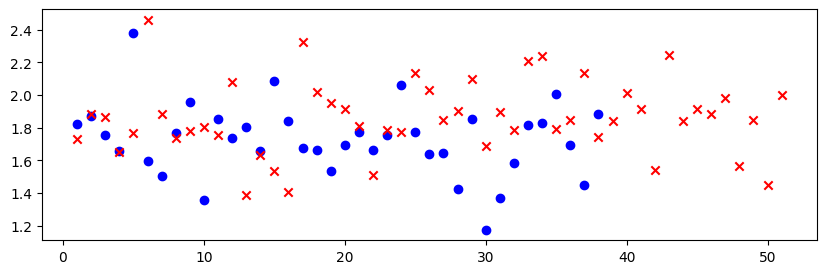

In [4]:
# Create a figure and axis
fig, ax = plt.subplots(1,1, figsize=(10, 3))

df_state_0 = f_df[f_df['class'] == 0]
df_state_1 = f_df[f_df['class'] == 1]

# Generate x-values for each state based on their positions
x_state_0 = range(1, len(df_state_0) + 1)
x_state_1 = range(1, len(df_state_1) + 1)

# Plot VMS values for state 0
ax.scatter(x_state_0, df_state_0['FD'], color='blue', label='State 0', marker='o')

# Plot VMS values for state 1
ax.scatter(x_state_1, df_state_1['FD'], color='red', label='State 1', marker='x')


In [4]:
#!pip install scikit-learn 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

In [10]:
features = f_df.drop('class', axis=1)
y = f_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, y, shuffle=True, test_size=0.2, random_state=42)

# Initialize LDA
lda = LDA()

# Fit the model
lda.fit(X_train, y_train)

# Transform the feature
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Predict
y_pred = lda.predict(X_test)
# Predict the probabilities
y_probs = lda.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_probs)

model_results = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
        "predicted": y_pred,
        "actual": y_test.values
    }
print(f"{'AUC':<8} {'Accuracy':<8}")
print(f"{model_results['auc']:<8.3f} {model_results['accuracy']:<8.3f}")


AUC      Accuracy
0.736    0.833   


In [11]:
model_results = {}

for f in features.columns:
    X = f_df[[f]]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    
    # Initialize LDA
    lda = LDA()
    
    # Fit the model
    lda.fit(X_train, y_train)
    
    # Transform the feature
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)
    
    # Predict
    y_pred = lda.predict(X_test)
    # Predict the probabilities
    y_probs = lda.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_probs)

    model_results[f] = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
        "predicted": y_pred,
        "actual": y_test.values
    }
print(f"{'Feature':<10} {'AUC':<8} {'Accuracy':<8}")
print()
for key, value in model_results.items():
    print(f"{key:<10} {value['auc']:<8.3f} {value['accuracy']:<8.3f}")

Feature    AUC      Accuracy

FD         0.806    0.778   
FD1_ext    0.653    0.556   
FD1_ext_q1 0.389    0.444   
FD1_ext_q2 0.736    0.611   
FD2_flex   0.528    0.500   
FD2_flex_q1 0.500    0.611   
FD2_flex_q2 0.653    0.611   
VMS        0.681    0.667   


In [6]:
svm_model_results = {}

features = f_df.drop('class', axis=1)
y = f_df['class']
features = features.drop('VMS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, y, shuffle=True, test_size=0.2, random_state=42)

rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = rbf_svm.predict(X_test)
# Predict the probabilities
y_probs = rbf_svm.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_probs)

svm_model_results = {
    "accuracy": round(accuracy,3),
    "auc": round(float(auc_value),3),
}
print(f"{'AUC':<8} {'Accuracy':<8}")
print(f"{svm_model_results['auc']:<8.3f} {svm_model_results['accuracy']:<8.3f}")

AUC      Accuracy
0.792    0.611   
